[0.06241379310344877, 0.026481481481481457, 0.01170289855072465, 0.005185185185185182]


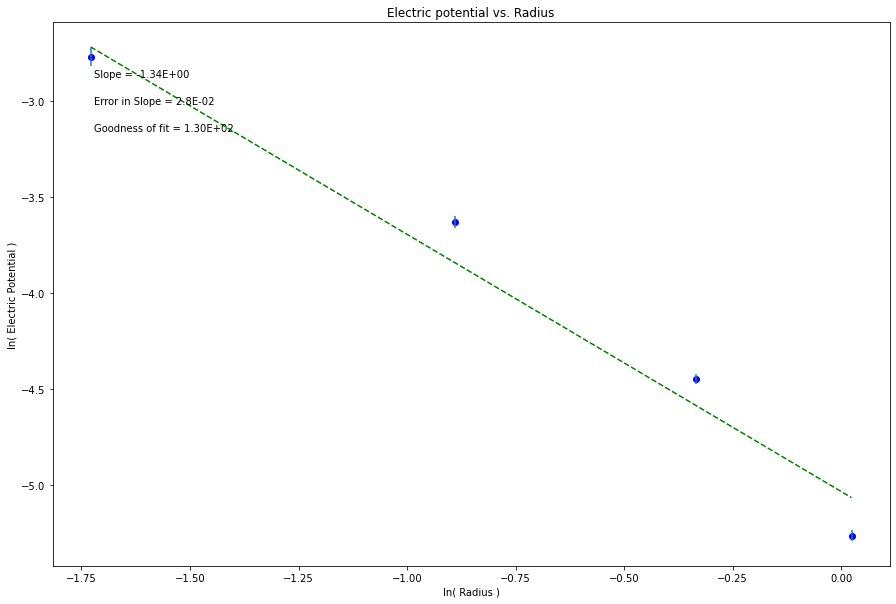

In [14]:
%matplotlib inline

import error_rules as er
import math
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt


radii = [0.087, 0.268, 0.554, 0.877, 1.171]  # meters
volts = [382.1, 385.0, 395.8, 423.4, 480.1]  # volts
unc_v = 0.0005  # volts
unc_volts = []
unc_r = 0.006 # meters
unc_radii = []

Es = []
rmids = []
unc_rmids = []
unc_Es = []

for idx in range(len(radii) - 1):
    Es.append(((radii[idx + 1] - radii[idx])/(volts[idx + 1] - volts[idx])))  #  append electric pots, -dv/dr
    rmids.append((radii[idx + 1] + radii[idx]) / 2)  # append average radius for each potential
    
    unc_volts.append(er.rule_3([unc_v] * 2))
    unc_radii.append(er.rule_3([unc_r] * 2))
    
    unc_rmids.append(er.rule_1((1/2), er.rule_3([unc_radii[idx], unc_radii[idx]])))
    unc_Es.append(er.rule_4(Q=Es[idx],
                values=[(radii[idx + 1] - radii[idx]), (volts[idx + 1] - volts[idx])],
                uncertainties=[unc_radii[idx], unc_volts[idx]],
                exponents=[1, -1]))

    
lnEs = []
lnrmids = []
unc_lnEs = []
unc_lnrmids = []

print(Es)

for (idx, E) in enumerate(Es):
    lnEs.append(math.log(E))
    unc_lnEs.append(math.log(E + unc_Es[idx]) - lnEs[idx])

for (idx, r) in enumerate(rmids):
    lnrmids.append(math.log(r))
    unc_lnrmids.append(math.log(E + unc_rmids[idx]) - lnrmids[idx])



#-------------------------------------------#
#Data Section - Create Arrays for data. Perform necessary calculations
#CHANGE THE VARIABLE NAMES and numbers to match your data
lnrmids = np.array(lnrmids) #what are units?
lnEs = np.array(lnEs) #what are units?


#--------------------------------------------#
#Create arrays for uncertainties
#CHANGE THE VARIABLE NAME and numbers to match your data 
unc_lnEs = np.array(unc_lnEs)


#--------------------------------------------#
#Re-assign variables as x, y, dy so that the following code may remain generic

x = lnrmids   #this should be the array you want to plot on the x axis
y = lnEs
dy = unc_lnEs  #this should be your error in y array

#----------------------------------------------#
#Don't need to change anything in this section!
 
#Find the intercept and slope, b and m, from Python's polynomial fitting function
b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)

#Write the equation for the best fit line based on the slope and intercept
fit = b+m*x

#Calculate the error in slope and intercept 
#def Delta(x, dy) is a function, and we will learn how to write our own at a later date. They are very useful!
def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
 
D=Delta(x, dy)
 
dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept

#Calculate the "goodness of fit" from the linear least squares fitting document
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)

#-----------------------------------------------------------------------#
#Plot data on graph. Plot error bars and place values for slope, error in slope and goodness of fit on the plot using "annotate"
plt.figure(figsize=(15,10))
 
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')
 
 
#create labels  YOU NEED TO CHANGE THESE!!!
plt.xlabel('ln( Radius )')
plt.ylabel('ln( Electric Potential )')
plt.title('Electric potential vs. Radius')
 
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none") #don't need to plot x error bars
 
plt.annotate('Slope = {value:.{digits}E}'.format(value=m, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
 
plt.annotate('Error in Slope = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')

plt.show()
